# Problem :2
### Download yolov4 weights from here https://newreleases.io/project/github/AlexeyAB/darknet/release/darknet_yolo_v4_pre

In [11]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
import cv2


In [12]:
test_img = cv2.imread('object_detection_test_image.png')


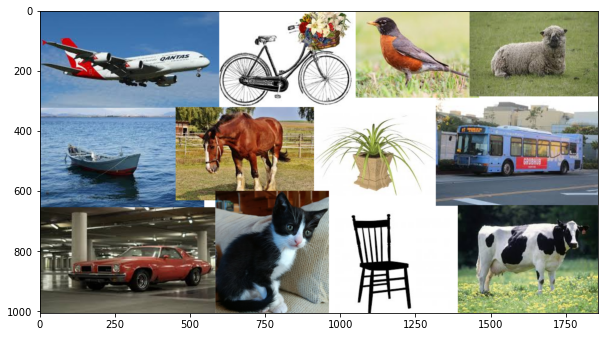

In [13]:
conv_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)    
fig = plt.figure(1, figsize=(10,10))
plt.imshow(conv_test_img)

In [15]:
def get_output_layers(net):
    
    #get all the layers present in the network
    layer_names = net.getLayerNames()
    #output from particular layers are computed
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    
    return output_layers

# function to draw bounding box on the detected object with class name
def draw_bounding_box(frame, class_ids, confidences, indices, boxes):
    
    #for loop to go all objects detects in an object. They are used to create labels and bounding boxes
    for i in indices:
        
        i = i[0]
        box = boxes[i]
        x = int(box[0])
        y = int(box[1])
        w = int(box[2])
        h = int(box[3])

        color = [int(c) for c in colors[class_ids[i]]]
    
        label = "{}: {:.4f}".format(labels[class_ids[i]], confidences[i])

        labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
    
        cv2.rectangle(frame, (x,y), (x+w,y+h), color, 2)

        cv2.putText(frame, label, (x - 10, y -10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

    return frame

In [16]:
# initialization

def generating_boxes(layer_outs, width, height):
    
    class_ids = []
    confidences = []
    boxes = []
    
# for loop to go over each layers
#for loop to compute output detections for each layer
    for out in layer_outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            
            if confidence > 0.25:
                #caclulate co-ordinates of detection boxes
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])
    return boxes, confidences, class_ids

In [17]:
def inference(frame, net, width, height, colors, labels, boxes = None, confidences = None, class_ids=None, indices=None):
    
    #set input blob & model parameters are set here
    blob = cv2.dnn.blobFromImage(frame, 1/ 255.0, (416,416), swapRB=True, crop=False)
    net.setInput(blob)
    
    layer_outs = net.forward(get_output_layers(net))
    
    #confidence threshold
    conf_threshold = 0.5
    #non-max supression threshold
    nms_threshold = 0.3

    boxes, confidences, class_ids = generating_boxes(layer_outs, width, height)
    
    #calculate no of objects detected in an frame
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    #call draw bounding box function to draw frames
    draw_bounding_box(frame, class_ids, confidences, indices, boxes)
    
    return frame, boxes, confidences, class_ids, indices

In [18]:
# Get width and height of an image
width = test_img.shape[1]
height = test_img.shape[0]

# read class names from coco text file and then store them as list

labels = open("coco.names").read().strip().split("\n")

#for each class color code a different bounding box color

colors = np.random.uniform(0, 255, size=(len(labels),3))

#Load Yolo weights and Yolo config path

weights = 'yolov4.weights'

config = 'yolov4.cfg'


net = cv2.dnn.readNet(weights, config)

In [19]:
frame = inference(test_img, net, width, height, colors, labels)

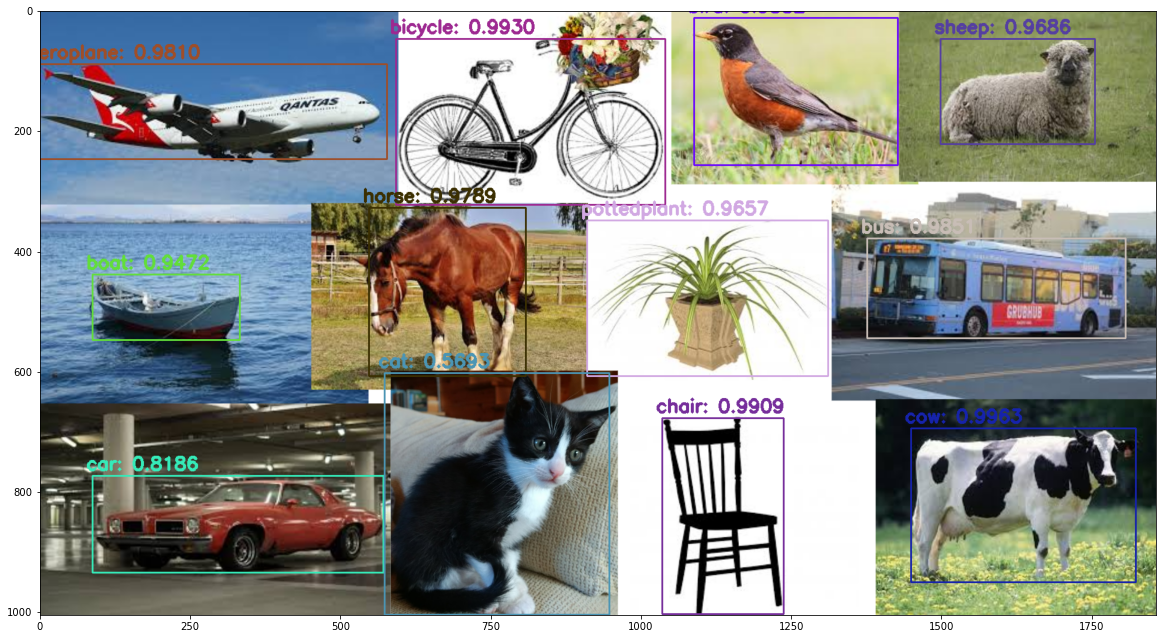

In [21]:
fig = plt.figure(2, figsize=(20,20))
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) )

# References

1. Lecture 3

2. https://towardsdatascience.com/yolo-object-detection-with-opencv-and-python-21e50ac599e9

3. https://github.com/pjreddie/darknet